# Analyzing borrowers’ risk of defaulting

The project is to prepare a report for a bank’s loan division.

Project goal: to find out if a customer’s marital status, number of children, level of income, and purposes why people take loans to impact whether they will default on a loan.

**Description of the data**

- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

**Data exploration**

Which actions we will perform:

- See general information about dataset;
- Check data for 0s;
- See unique values of columns;
- Find problematic data in columns;
- Check data for missing values;
- Try to figure out some connection between missing values and other data.

**Data transformation**

Which actions we will perform:

- Work with duplicates.
- Transformed problematic values of `education`, `children`, `days_employed`, `dob_years`, `gender` and `income_type` columns.
- Work with missing values in `days_employed` and `total_income`.

**Categorization of data**

Which actions we will perform:

- Unite all the `purpose` values into categories;
- Categorize `total_income` values into levels of income.

**Checking the Hypotheses**

We will try to answer these questions:

1. Is there a correlation between having children and paying back on time?
2. Is there a correlation between family status and paying back on time?
3. Is there a correlation between income level and paying back on time?
4. How does credit purpose affect the default rate?

## Open the data file and have a look at the general information. 

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np

from pymystem3 import Mystem
from collections import Counter
m = Mystem()

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

In [2]:
# Load the data

data = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [3]:
# Let's see how many rows and columns our dataset has

data.shape

(21525, 12)

In [4]:
# let's print the first 30 rows

data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
children,21525.0,NaN,NaN,NaN,0.538908,1.381587,-1.0,0.0,0.0,1.0,20.0
days_employed,19351.0,NaN,NaN,NaN,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,401755.400475
dob_years,21525.0,NaN,NaN,NaN,43.29338,12.574584,0.0,33.0,42.0,53.0,75.0
education,21525,15,secondary education,13750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_id,21525.0,NaN,NaN,NaN,0.817236,0.548138,0.0,1.0,1.0,1.0,4.0
family_status,21525,5,married,12380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_status_id,21525.0,NaN,NaN,NaN,0.972544,1.420324,0.0,0.0,0.0,1.0,4.0
gender,21525,3,F,14236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_type,21525,8,employee,11119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debt,21525.0,NaN,NaN,NaN,0.080883,0.272661,0.0,0.0,0.0,0.0,1.0


In [6]:
# Check data for 0s

for i in data:
    print(i, len(data[data[i]==0]))

children 14149
days_employed 0
dob_years 101
education 0
education_id 5260
family_status 0
family_status_id 12380
gender 0
income_type 0
debt 19784
total_income 0
purpose 0


In [7]:
# Get info on data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
# Unique values of 'education'

data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [9]:
# Unique values of 'gender'

data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [10]:
# Unique values of 'purpose'

data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [11]:
# Unique values of 'children'

data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Issues that we can identify after the first data exploration:**
    
- There are negative numbers in the `days_employed` column. For example, -8437.673028 or -5623.422610.
- There are too big numbers in the `days_employed` column. For example, 340266.072047 or 400281.136913.
- In the `education` column, the same types of education are written in different formats. 
    For example, 'Secondary Education' and 'SECONDARY EDUCATION'.
- In the `purpose` column, the same purposes are written in different formats. 
    For example, 'purchase of the house' and 'purchase of the house for my family'.
- In `dob_years` there are 0 values.
- Wierd values in the `children` column, like -1 and 20.

There are **missing values** in two columns: `days_employed` and `total_income`. The number of missing values is the same, so it can mean that these values are symmetric. 

We can assume that in the columns `days_employed` and `total_income` the data is missing for those categories of customers who do not have work experience and monthly income, for example, students. In the `total_income` column, this data may also be omitted for retirees. When entering information, this data could be missed by clients themselves or by the bank employees who interviewed them. It is also possible that the data is omitted due to a technical error, and there is no logic here.

In [12]:
# Let's look at the filtered table with missing values in the first column with missing data

data[data['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [13]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

data[(data['days_employed'].isnull()) &(data['total_income'].isnull())] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Intermediate conclusion**

The number of rows in the filtered table matches the number of missing values. So missing values are symmetric.

Next steps:

- Consider whether the missing data could be due to the specific client characteristic - `income_type` categories. Then, this parameter can logically influence to `total_income` values.
- Check whether any dependence missing values have on the values of other indicators like age or family status.

This can help us understand if values were missed randomly or for some logical explanation.

In [14]:
# Checking distribution of missing values by types of income

data[data['total_income'].isnull()]['income_type'].value_counts()


employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

In [15]:
# Checking the distribution in the whole dataset

data['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

`income_type` distribution of the original dataset is the same as the `income_type` distribution of the missing values. So we can say that there is no connection between missing values and `income_type`.

In [16]:
#See if there is direct connection between missing values in 'total_income' and the family_status.

data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [17]:
data[data['total_income'].isnull()]['family_status'].value_counts()

married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64

`family_status` distribution of the original dataset is the same as the `family_status` distribution of the missing values. So we can say that there is no connection between missing values and `family_status`. So probably values are missing randomly.

In [18]:
#See if there is direct connection between missing values in 'total_income' and the age of clients ('dob_years')

data[data['total_income'].isnull()]['dob_years'].value_counts()

34    69
40    66
31    65
42    65
35    64
36    63
47    59
41    59
30    58
28    57
57    56
58    56
54    55
38    54
56    54
37    53
52    53
39    51
33    51
50    51
51    50
45    50
49    50
29    50
43    50
46    48
55    48
48    46
53    44
44    44
60    39
61    38
62    38
64    37
32    37
27    36
23    36
26    35
59    34
63    29
25    23
24    21
66    20
65    20
21    18
22    17
67    16
0     10
68     9
69     5
20     5
71     5
70     3
72     2
19     1
73     1
Name: dob_years, dtype: int64

There is no direct connection between missing values in `total_income` and age of clients.

**Conclusions**

We considered whether the missing data could be due to the specific client characteristics and didn't find any connection between missing values and `income_type`, `family_status` or `dob_years`. So we can confirm that missing values are accidental.

In the further analysis, we will transform data:

- to decide what to do with missing values: drop or replace them,
- to find and decide what to do with duplicates,
- to fix spelling in `education`,
- to work on weird values in the `children` column, like -1 and 20,
- to decide what to do with problematic values in `days_employed`,
- to drop the 0 values in `dob_years`,
- to drop the 'XNA' value in `gender`,
- to work with categories with few values in `income_type`.

## Data transformation

In [19]:
# Check duplicates in data

data.duplicated().sum()

54

In [20]:
# Let's see all values in 'education' column to check if and what spellings will need to be fixed

data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

There are the same categories with different registers. For example, "bachelor's degree" and "BACHELOR'S DEGREE" or 'PRIMARY EDUCATION' and 'Primary Education'. We need to fix it and transform all the values to a lower register.

In [21]:
# Fix the registers

data['education'] = [x.lower() for x in data['education']]

In [22]:
# Checking all the values in the column to make sure we fixed them

data['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [23]:
# Check duplicates after 'education' transformation

data.duplicated().sum()

71

After we reduced the number of unique values in education, the number of duplicates in the data increased (before - 54, after - 71). We will work with duplicates during further analysis.

In [24]:
# Let's see the distribution of values in the `children` column

data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

There are problematic values in `children` column: -1 and 20. We can assume that the values -1 were erroneously added to the data instead of 1, and 20 instead of 2.

In [25]:
#Distribution of problematic data in 'children' column

minus_children = data[data['children']==-1]['children'].count()
many_children = data[data['children']==20]['children'].count()

(minus_children + many_children)/len(data)*100

0.5714285714285714

The distribution of problematic values in the `children` column is less than 1%. So we can drop this data.

In [26]:
# Drop problematic data in 'children' column

data.drop(data[data['children']==-1].index, inplace=True)
data.drop(data[data['children']==20].index, inplace=True)

In [27]:
# Checking the 'children' column again to make sure it's all fixed

data['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [28]:
# Find problematic data in `days_employed`

data['days_employed'].head(15)

0      -8437.673028
1      -4024.803754
2      -5623.422610
3      -4124.747207
4     340266.072047
5       -926.185831
6      -2879.202052
7       -152.779569
8      -6929.865299
9      -2188.756445
10     -4171.483647
11      -792.701887
12              NaN
13     -1846.641941
14     -1844.956182
Name: days_employed, dtype: float64

<AxesSubplot:>

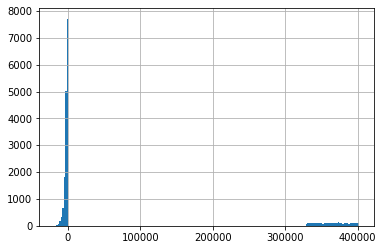

In [29]:
data['days_employed'].hist(bins=200)

In [30]:
data['days_employed'].min()

-18388.949900568383

In [31]:
data['days_employed'].max()

401755.40047533

There are a lot of problematic data in the `days_employed` column: missing values, negative values, and too big values.

In [32]:
# Check the destribution of problematic values

data[data['days_employed'] < 0].count()  #15809
data['days_employed'].isnull().sum()     #2162
data[data['days_employed'] >= 300000].count() #3431
(15809 + 2162 + 3431)/len(data)*100

100.0

The distribution of problematic values in this column is 100%. It could've been due to some technical issues. For example, positive numbers may have been accidentally entered as negative. So we can change negative numbers to positive ones.

Data in this column is presented in the form of the hours. Let's convert hours to days.

In [33]:
# Converting hours to days

day = 24
data['days_employed'] = data['days_employed']/day
print(data['days_employed'])

0         -351.569709
1         -167.700156
2         -234.309275
3         -171.864467
4        14177.753002
             ...     
21520     -188.721528
21521    14330.725172
21522      -88.056120
21523     -129.686738
21524      -82.687816
Name: days_employed, Length: 21402, dtype: float64


In [34]:
# Changing negative numbers to positive

data['days_employed'] = data['days_employed'].abs()
print(data['days_employed'])

0          351.569709
1          167.700156
2          234.309275
3          171.864467
4        14177.753002
             ...     
21520      188.721528
21521    14330.725172
21522       88.056120
21523      129.686738
21524       82.687816
Name: days_employed, Length: 21402, dtype: float64


<AxesSubplot:>

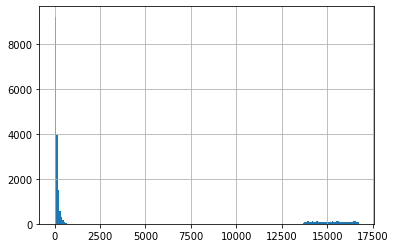

In [35]:
# Check the 'days_employed' data

data['days_employed'].hist(bins=200)

The significant part of values is still enormous. Maybe they were added in the form of minutes? Let's convert them to hours.

In [36]:
# Converting minutes to hours

l = []
for i in data['days_employed']:
    if i <= 10000:
        l.append(i)
    else:
        l.append(i/60)
        
data['days_employed'] = l

<AxesSubplot:>

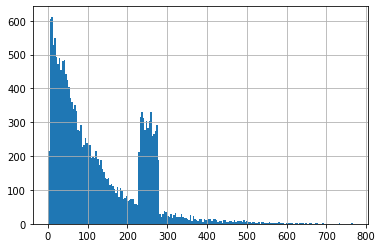

In [37]:
# Check the data

data['days_employed'].hist(bins=200)

In [38]:
# Find problematic data in 'dob_years'

data['dob_years'].value_counts()

35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
29    543
44    543
48    536
30    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
53    457
57    457
51    446
59    441
55    441
26    406
60    376
25    356
61    353
62    351
63    268
24    263
64    263
23    252
65    194
66    183
22    183
67    167
21    110
0     100
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

<AxesSubplot:>

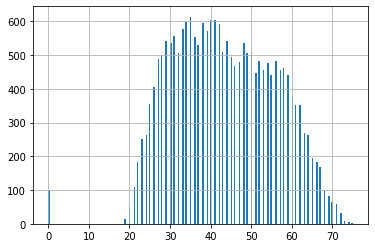

In [39]:
data['dob_years'].hist(bins=200)

There are customers with 0 age in data. Seems problematic. 

In [40]:
# Check the `dob_years` for suspicious values and count the percentage

data[data['dob_years']==0]['dob_years'].count()/len(data)*100

0.4672460517708626

The distribution of 0 values is less than 1%, so we can drop them.

In [41]:
# Drop the 0 values in 'dob_years'

data.drop(data.loc[data['dob_years']==0].index, inplace=True)

In [42]:
# Check the result

data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

In [43]:
# Find problematic data in 'family_status'

data['family_status'].value_counts()

married              12254
civil partnership     4139
unmarried             2783
divorced              1179
widow / widower        947
Name: family_status, dtype: int64

In [44]:
data.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,351.569709,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,167.700156,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,234.309275,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,171.864467,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,236.295883,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,38.591076,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,119.966752,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,6.365815,50,secondary education,1,married,0,M,employee,0,21731.829,education
8,2,288.744387,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,91.198185,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


There is no problematic values. Everything looks good.

In [45]:
# Find problematic data in 'gender'

data['gender'].value_counts()

F      14083
M       7218
XNA        1
Name: gender, dtype: int64

There is weird gender 'XNA' with one value. We can drop it.

In [46]:
# Drop 'XNA' value in 'gender'

data.drop(data.loc[data['gender']== 'XNA'].index, inplace=True)

In [47]:
# Check the result

data['gender'].value_counts()

F    14083
M     7218
Name: gender, dtype: int64

In [48]:
# Find problematic data in 'income_type'

data['income_type'].head(30)

0          employee
1          employee
2          employee
3          employee
4           retiree
5          business
6          business
7          employee
8          employee
9          employee
10         business
11         employee
12          retiree
13         employee
14         business
15         employee
16         employee
17         employee
18          retiree
19         employee
20         employee
21         employee
22         employee
23         employee
24          retiree
25          retiree
26    civil servant
27         employee
28         employee
29          retiree
Name: income_type, dtype: object

In [49]:
data['income_type'].value_counts()

employee                       10996
business                        5033
retiree                         3819
civil servant                   1447
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

There is a small amount of data in the 'entrepreneur', 'unemployed', 'student', and 'paternity/maternity leave' categories. The amount of data is 1 and 2 values in each so we can drop these categories. There is weird gender 'XNA' with one value. We can drop it.

In [50]:
# Address the problematic values

data.drop(data.loc[data['income_type']== 'entrepreneur'].index, inplace=True)
data.drop(data.loc[data['income_type']== 'unemployed'].index, inplace=True)
data.drop(data.loc[data['income_type']== 'student'].index, inplace=True)
data.drop(data.loc[data['income_type']== 'paternity / maternity leave'].index, inplace=True)

In [51]:
# Check the result

data['income_type'].value_counts()

employee         10996
business          5033
retiree           3819
civil servant     1447
Name: income_type, dtype: int64

In [52]:
# Checking duplicates in data

data[data.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [53]:
data.duplicated().sum()

71

In [54]:
# Destribution of duplicates in data

data.duplicated().sum()/len(data)*100

0.33341159896689365

There are less than 1% duplicates in data, so we can drop them.

In [55]:
# Drop the duplicates

data.drop_duplicates(inplace = True)

In [56]:
# Last check whether we have any duplicates
data.duplicated().sum()

0

In [57]:
# Check the size of the dataset after first manipulations with it

data.shape

(21224, 12)

We dropped duplicates and removed problematic data in `children`, `gender`, `income_type`, and `dob_years` columns. As a result of data transformation, the number of rows in the dataset has decreased (before - 21525, after - 21224). 

# Working with missing values

In [58]:
# Find the dictionaries

We can create the dictionaries, for example, for `family_status` and `family_status_id` or `education` and `education_id`. Still, we don't need it in this analysis since we don't have any numerical calculations on the keys in values.

### Restoring missing values in `total_income`

Columns `total_income` and `days_employed` have missing values.

To restore missing values in `total_income`, we will use the mean or median income on age categories. To do that, we will create a new column with three age categories (youth, adults, and seniors) and count the mean and median values of `total_income` for each of them. Then we will replace missing values in `total_income` by mean or median of the corresponding category.

To restore missing values in `days_employed` we will use the mean or median income on "income_type" because we can assume that working days connect with the type of employment of clients.

In [59]:
# Check missing values in `total_income`

data[data['total_income'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Let's take a row with index 12 for chacking the result of restoring missing values. Now there is 'NaN' value in `total_income` column.

In [60]:
# Let's write a function that calculates the age category

def age_group(age):
    
    if age <= 24:
        return 'youth'
    elif age <= 55:
        return 'adults'
    return 'seniors' 

In [61]:
# Test if the function works

print(age_group(70))

seniors


In [62]:
# Creating new column based on function

data['age_group'] = data['dob_years'].apply(age_group)


In [63]:
# Checking how values in the new column

data['age_group'].value_counts()

adults     16040
seniors     4315
youth        869
Name: age_group, dtype: int64

In [64]:
# Check the number of missing values in 'total_income'

data['total_income'].isna().sum()

2080

In [65]:
# Look at the mean values for income based on 'age_group'

data.groupby('age_group')['total_income'].mean()

age_group
adults     27788.842509
seniors    23919.901503
youth      22726.120719
Name: total_income, dtype: float64

In [66]:
# Look at the median values for income based on 'age_group'

data.groupby('age_group')['total_income'].median()

age_group
adults     24112.3245
seniors    20669.3790
youth      20577.5820
Name: total_income, dtype: float64

According to age groups, there is not much difference between mean and median distribution in `total_income`, so we can choose any of them to fill missing values. We fill them with mean values.

In [67]:
# Function that we will use for filling in missing values

data['total_income'] = data.groupby('age_group')['total_income']\
                        .transform(lambda grp: grp.fillna(np.mean(grp)))

In [68]:
data['total_income'].isnull().sum()

0

In [69]:
data[data['total_income'].isnull()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


Let's check the result of restoring missing values. To do that, we can take a row with index 12 again. Before the restoring process, there was a 'NaN' value in the `total_income` column. It must be replaced by the mean value of the corresponding age category.

In [70]:
# Check if it works

data.iloc[12]

children                              0
days_employed                       NaN
dob_years                            65
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                M
income_type                     retiree
debt                                  0
total_income               23919.901503
purpose               to have a wedding
age_group                       seniors
Name: 12, dtype: object

In [71]:
data.groupby('age_group')['total_income'].mean()

age_group
adults     27788.842509
seniors    23919.901503
youth      22726.120719
Name: total_income, dtype: float64

In [72]:
# Check if we got any errors

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21224 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21224 non-null  int64  
 1   days_employed     19144 non-null  float64
 2   dob_years         21224 non-null  int64  
 3   education         21224 non-null  object 
 4   education_id      21224 non-null  int64  
 5   family_status     21224 non-null  object 
 6   family_status_id  21224 non-null  int64  
 7   gender            21224 non-null  object 
 8   income_type       21224 non-null  object 
 9   debt              21224 non-null  int64  
 10  total_income      21224 non-null  float64
 11  purpose           21224 non-null  object 
 12  age_group         21224 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


We don't have missing values in the `total_income` column anymore.

###  Restoring values in `days_employed`

To restore missing values in `days_employed` we will use the mean or median income on "income_type" because we can assume that working days connect with the type of employment of clients.

In [73]:
# Check missing values in `days_employed`

data[data['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,23919.901503,to have a wedding,seniors
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,27788.842509,education,adults
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,23919.901503,building a real estate,seniors
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,27788.842509,second-hand car purchase,adults
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,27788.842509,to have a wedding,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,business,0,27788.842509,purchase of a car,adults
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,27788.842509,wedding ceremony,adults
21497,0,NaN,48,bachelor's degree,0,married,0,F,business,0,27788.842509,building a property,adults
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,27788.842509,building a real estate,adults


In [74]:
# Check the number of missing values in 'total_income'

data['days_employed'].isna().sum()

2080

In [75]:
# Look at the mean values for 'days_employed' based on 'income_type'

data.groupby('income_type')['days_employed'].mean()

income_type
business          88.313036
civil servant    141.338303
employee          96.905870
retiree          253.498254
Name: days_employed, dtype: float64

In [76]:
# Look at the median values for 'days_employed' based on 'income_type'

data.groupby('income_type')['days_employed'].median()

income_type
business          64.833069
civil servant    111.370997
employee          65.574628
retiree          253.659098
Name: days_employed, dtype: float64

According to income types, there is not much difference between mean and median distribution in `days_employed`, so we can choose any of them to fill missing values. We fill them with mean values.

In [77]:
# Function that we will use for filling in missing values

data['days_employed'] = data.groupby('income_type')['days_employed']\
                        .transform(lambda grp: grp.fillna(np.mean(grp)))

In [78]:
data['days_employed'].isnull().sum()

0

In [79]:
data[data['days_employed'].isnull()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


In [80]:
# Check if we got any errors

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21224 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21224 non-null  int64  
 1   days_employed     21224 non-null  float64
 2   dob_years         21224 non-null  int64  
 3   education         21224 non-null  object 
 4   education_id      21224 non-null  int64  
 5   family_status     21224 non-null  object 
 6   family_status_id  21224 non-null  int64  
 7   gender            21224 non-null  object 
 8   income_type       21224 non-null  object 
 9   debt              21224 non-null  int64  
 10  total_income      21224 non-null  float64
 11  purpose           21224 non-null  object 
 12  age_group         21224 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


We don't have missing values in the `days_employed` column anymore.

## Categorization of data

We will work with categorized data to answer the questions and test the hypotheses. To find out how credit purpose affects the default rate, we need to unite all the `purpose` values into categories.

We also need to categorize `total_income` values to analyze a correlation between income level and paying back on time.

In [81]:
# Check the unique values in 'purpose'

data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

Based on the unique values, we can identify four main groups of purposes:
    
- real estate
- car purchase
- education
- wedding

Let's categorize data based on these themes.

In [82]:
# Lemmatize the words

purpose = 'purchase of the house'
words = nltk.word_tokenize(purpose)
print(words)
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
print(lemmas)

['purchase', 'of', 'the', 'house']
['purchase', 'of', 'the', 'house']


In [83]:
# Create a column with the categories

lemmas_list_all = []

for purpose in data['purpose'].unique():
    words = nltk.word_tokenize(purpose)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas = [l.lower() for l in lemmas]
    for i in lemmas:
            lemmas_list_all.append(i)

In [84]:
lemmas_list_all

['purchase',
 'of',
 'the',
 'house',
 'car',
 'purchase',
 'supplementary',
 'education',
 'to',
 'have',
 'a',
 'wedding',
 'housing',
 'transaction',
 'education',
 'having',
 'a',
 'wedding',
 'purchase',
 'of',
 'the',
 'house',
 'for',
 'my',
 'family',
 'buy',
 'real',
 'estate',
 'buy',
 'commercial',
 'real',
 'estate',
 'buy',
 'residential',
 'real',
 'estate',
 'construction',
 'of',
 'own',
 'property',
 'property',
 'building',
 'a',
 'property',
 'buying',
 'a',
 'second-hand',
 'car',
 'buying',
 'my',
 'own',
 'car',
 'transaction',
 'with',
 'commercial',
 'real',
 'estate',
 'building',
 'a',
 'real',
 'estate',
 'housing',
 'transaction',
 'with',
 'my',
 'real',
 'estate',
 'car',
 'to',
 'become',
 'educated',
 'second-hand',
 'car',
 'purchase',
 'getting',
 'an',
 'education',
 'car',
 'wedding',
 'ceremony',
 'to',
 'get',
 'a',
 'supplementary',
 'education',
 'purchase',
 'of',
 'my',
 'own',
 'house',
 'real',
 'estate',
 'transaction',
 'getting',
 'higher'

In [85]:
#How much times every word repeats

Counter(lemmas_list_all)

Counter({'purchase': 6,
         'of': 5,
         'the': 2,
         'house': 3,
         'car': 9,
         'supplementary': 2,
         'education': 7,
         'to': 6,
         'have': 1,
         'a': 9,
         'wedding': 3,
         'housing': 3,
         'transaction': 4,
         'having': 1,
         'for': 2,
         'my': 4,
         'family': 1,
         'buy': 4,
         'real': 7,
         'estate': 7,
         'commercial': 2,
         'residential': 1,
         'construction': 1,
         'own': 4,
         'property': 4,
         'building': 2,
         'buying': 3,
         'second-hand': 2,
         'with': 2,
         'become': 1,
         'educated': 1,
         'getting': 2,
         'an': 1,
         'ceremony': 1,
         'get': 1,
         'higher': 1,
         'profile': 1,
         'university': 2,
         'renting': 1,
         'out': 1,
         'renovation': 1,
         'going': 1})

In [86]:
# Create categories

real_estate_category = ['house', 'housing', 'real', 'estate', 'construction', 'property', 'building', 'renovation']
car_category = ['car']
education_category = ['education', 'educated', 'university']
wedding_category = ['wedding', 'ceremony']

In [1]:
# Building up the function

def lemmatization_func(line):
    words = nltk.word_tokenize(line)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas = [l.lower() for l in lemmas]
    return lemmas

In [88]:
# Check if function works

example = data.loc[0]['purpose']
example

'purchase of the house'

In [89]:
lemmatization_func(example)

['purchase', 'of', 'the', 'house']

In [90]:
# Examples of Any

any(word in lemmatization_func(example) for word in real_estate_category)

True

In [91]:
any(word in lemmatization_func(example) for word in wedding_category)

False

In [92]:
# Unite purposes to categories

def lemmatization_func(line):
    words = nltk.word_tokenize(line)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas = [l.lower() for l in lemmas]
    if any(word in lemmas for word in real_estate_category):
        return 'real_estate'
    elif any(word in lemmas for word in car_category):
        return 'car'
    elif any(word in lemmas for word in education_category):
        return 'education'
    elif any(word in lemmas for word in wedding_category):
        return 'wedding'

In [93]:
# Create column with categories

data['purpose_category'] = data['purpose'].apply(lemmatization_func)

In [94]:
data['purpose_category'].value_counts()

real_estate    10699
car             4257
education       3970
wedding         2298
Name: purpose_category, dtype: int64

Let's categorize the `total_income` data by levels of income.

<AxesSubplot:>

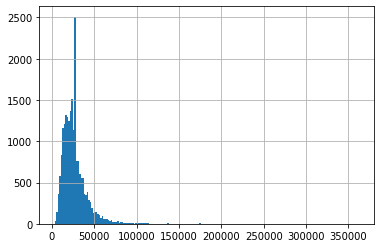

In [95]:
data['total_income'].hist(bins=200)

In [96]:
# Creating function for categorizing into different numerical groups based on ranges

def income_level(income):
    
    if income <= 25000:
        return 'low'
    elif income <= 50000:
        return 'middle'
    return 'high'

In [97]:
# Creating column with categories

data['income_level'] = data['total_income'].apply(income_level)

In [98]:
# Count values in each category to see the distribution

data['income_level'].value_counts()

low       11151
middle     8760
high       1313
Name: income_level, dtype: int64

## Checking the Hypotheses


First, we need to count the debt rate – the percentage of all customers who have debt on loan repayment.

In [99]:
# Getting summary statistics for the column

data['debt'].value_counts()

0    19502
1     1722
Name: debt, dtype: int64

In [100]:
#Share of people who had debt on loan repayment (debt rate)

data['debt'].mean()

0.08113456464379948

About 8% of all customers have debt on loan repayment. 

**Is there a correlation between having children and paying back on time?**

In [101]:
# Check the children data and paying back on time

data['children'].value_counts()

0    14017
1     4791
2     2038
3      328
4       41
5        9
Name: children, dtype: int64

In [102]:
# Calculating default-rate based on the number of children

data.groupby(['children'])['debt'].mean().reset_index().sort_values(by = 'debt')

,children,debt
5,5,0.000000
0,0,0.075480
3,3,0.082317
1,1,0.091839
2,2,0.094701
4,4,0.097561


**Conclusion**

People with four children have debts more often than others. People without children have the highest default rate. So there is a correlation between having children and paying back on time.


**Is there a correlation between family status and paying back on time?**

In [103]:
# Check the family status data and paying back on time

data['family_status'].value_counts()

married              12210
civil partnership     4110
unmarried             2779
divorced              1179
widow / widower        946
Name: family_status, dtype: int64

In [104]:
# Calculating default-rate based on family status

data.groupby(['family_status'])['debt'].mean().reset_index().sort_values(by = 'debt')

,family_status,debt
4,widow / widower,0.065539
1,divorced,0.071247
2,married,0.075430
0,civil partnership,0.093187
3,unmarried,0.097877


**Conclusion**

According to the analysis, unmarried people and people in a civil partnership have more debts than others. On the other hand, widows and widowers have the highest default rate. So there is a correlation between family status and paying back on time.

**Is there a correlation between income level and paying back on time?**

In [105]:
# Check the income level data and paying back on time

data['income_level'].value_counts()

low       11151
middle     8760
high       1313
Name: income_level, dtype: int64

In [106]:
# Calculating default-rate based on income level

data.groupby(['income_level'])['debt'].mean().reset_index().sort_values(by = 'debt')

,income_level,debt
0,high,0.070069
2,middle,0.081164
1,low,0.082414


**Conclusion**

People with low income level have debts more often than others. So there is a correlation between the level of income and paying back on time.

**How does credit purpose affect the default rate?**

In [107]:
# Check the purposes and paying back on time

data['purpose_category'].value_counts()

real_estate    10699
car             4257
education       3970
wedding         2298
Name: purpose_category, dtype: int64

In [108]:
# Check the percentages for default rate for each credit purpose and analyze them

data.groupby(['purpose_category'])['debt'].mean().reset_index().sort_values(by = 'debt')

,purpose_category,debt
2,real_estate,0.072530
3,wedding,0.078764
1,education,0.092947
0,car,0.093023


**Conclusion**

People who take a loan for education and car purchase have debts more often than others. On the other hand, people who take money for real estate have the highest default rate has. So there is a correlation between purposes and paying back on time.

# General Conclusion 

The goal of the analysis was to find out if a customer’s marital status, number of children, level of income, and purposes why people take loans to impact whether they will default on a loan.

**We had data set with information about bank customers:**

- the number of children in the family
- work experience in days (`days_employed`)
- age (`dob_years`)
- education
- family status
- gender
- type of employment (`income_type`)
- was there any debt on loan repayment (`debt`)
- monthly income (`total_income`)
- the purpose of obtaining a loan

**After the data exploration, we identified some issues:**

- Duplicates
- Missing values in `days_employed` and ‘total_income’ columns.
- Negative and too big numbers in work `days_employed`. 
- The same types of education were written in different formats. 
- The same purposes are written in various formats. 
- In `dob_years` column there were 0 values.
- Wierd values in `children` column, like -1 and 20.
- 'XNA' value in `gender`.
- Categories with a small number of values in `income_type`.

We also considered whether the missing data could be due to the specific client characteristics and didn't find any connection between missing values and `income_type`, `family_status`, or `dob_years`. So we confirmed that missing values are accidental.

**What we did during data transformation:**

- Dropped duplicates.
- Transformed all the values of `education` to a lower register. 
- Dropped -1 and 20 values in a `children` column.
- We found out that all data in `days_employed` is problematic. We didn't need this column in our analysis, so we left `days_employed` as it is.
- Dropped 0 values from `dob_years`.
- Dropped 'XNA' values from `gender`.
- Dropped categories with a small number of values from `income_type`.

**How we worked with missing values:**

We used the income mean on age categories to restore missing values in `total_income`. To do that, we created a new column with three age categories (youth, adults, and seniors) and countув mean values of `total_income` for each of them. Then we replaced missing values in `total_income` by the mean of the corresponding category.

We could replace missing values in `days_employed` the same way as in `total_income`, but we didn’t have adequate data in this column. So mean and median values of `days_employed` were useless. We didn't need `days_employed` data in our investigation, so we left missing values as they are.


We worked with categorized data to answer the questions and test the hypotheses. 

**How we did data categorization:**

To determine how credit purposes affect the default rate, we needed to unite all the `purpose` values into categories. To do that, we categorized data based on four themes (real estate, car purchase, education, and wedding) with lemmatizing of words. 

We also needed to categorize `total_income` values to analyze the correlation between income level and paying back on time. To do that, we categorized the `total_income` data by income levels (low, middle, and high). 

**After that, we checked out the Hypotheses.**

First, we counted the debt rate – the percentage of all customers who have debt on loan repayment. We found out that about 8% of all customers have debt on loan repayment.

With analysis of debt rate, we tried to answer these questions:

1. Is there a correlation between having children and paying back on time?
2. Is there a correlation between family status and paying back on time?
3. Is there a correlation between income level and paying back on time?
4. How does credit purpose affect the default rate?

**We found out that:**

1. People with four children have debts more often than others. The highest default rate has people without children. 
2. Unmarried people and people in a civil partnership have debts more often than others. The highest default rate has widows and widowers.
3. People with a low income level have debts more often than others. So there is a correlation between the level of income and paying back on time.
4. People who take a loan for education and car purchase have debts more often than others. The highest default rate has people who take money for real estate.

We can conclude that customers’ marital status, number of children, level of income, and purposes why people take loans impact whether they will default on a loan.










